# Drill - Present the same data different ways

The variables described in this dataset are detailed below:


| Variable                                    | Variable Description                               |
|---------------------------------------------|----------------------------------------------------|
| Age*                                        | Age in years                                       |
| Sex                                         | 1=male, 0=female                                   |
| CP*                                         | Chest Pain Type, Range 0-3, 0=none, 3=max severity |
| trestbps*                                   | Resting systolic blood pressure                    |
| chol* : fasting serum cholestoral in mg/dl  | fasting serum cholesterol in mg/dl                 |
| fbs*                                        | fasting blood sugar in mg/dl                       |
| restecg*                                    | resting electrocardiograph results                 |
| thalach                                     | maximum heartrate from thalium test                |
| exang*                                      | exercise induced angina (0=no, 1=yes)              |
| oldpeak*                                    | ST depression induced by exercise relative to rest |
| slope*                                      | slope of the peak exercise ST segment              |
| ca                                          | number of major vessels colored by flouroscopy     |
| thal                                        | 1=normal, 2=fixed defect, 3=reversable             |
| target                                      | Presence of heart disease (1=true, 0=false)        |

| Variable                                    | Categories                                         |
|---------------------------------------------|----------------------------------------------------|
| Sex''                                       | 1=male, 0=female                                   |
| CP'                                         | 0=none, 3=max severity                             |
| fbs'                                        | 0=bs<120mg/dl, 1=bs>120mg/dl                       |
| restecg'                                    | 0=normal, 1= abnormality, 2=probable/definite lvh  |
| exang''                                     | exercise induced angina (0=no, 1=yes)              |
| slope'                                      | 1=upsloping, 2=flat, 3=downsloping                 |
| ca'                                         | number of major vessels colored by flouroscopy     |
| thal'                                       | 1=normal, 2=fixed defect, 3=reversable             |
| target''                                    | Presence of heart disease (1=true, 0=false)        |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind
import seaborn as sns
%matplotlib inline

# Summary statistics and visualizations

In [2]:
heartdisease_df= pd.read_csv('heart.csv')
print(heartdisease_df.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

## Choose one variable and plot that variable four different ways.

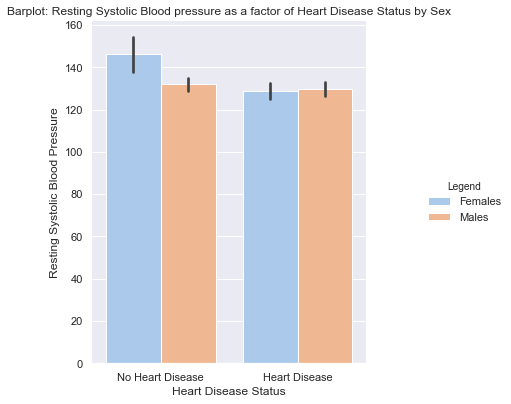

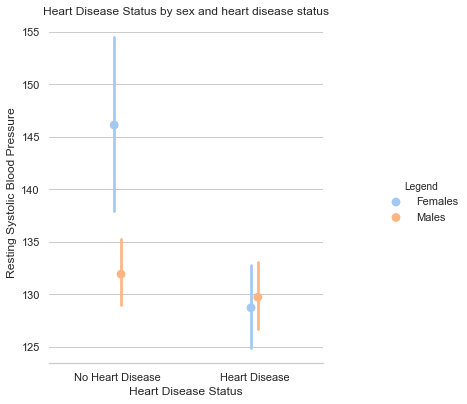

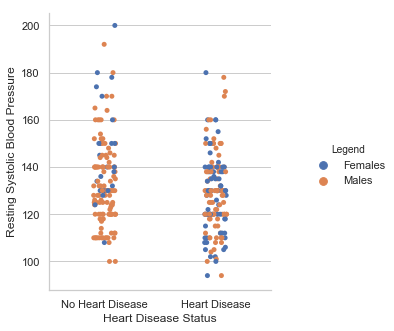

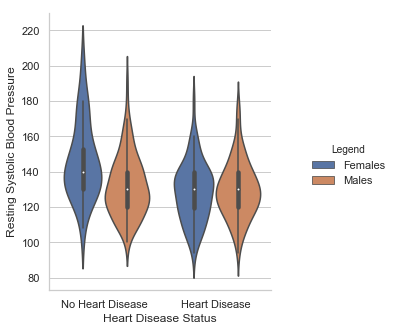

In [18]:
#create new column for data to plot....change target to string so that string shows in the plot

def newcolumn(heartdisease_df):
    if heartdisease_df['target'] == 0:
        val = 'Absence of Heart Disease'
    elif heartdisease_df['target'] == 1:
        val = 'Presence of Heart Disease'
    return val

heartdisease_df['hd_status_string'] = heartdisease_df.apply(newcolumn, axis=1)

#above code didn't fix the issue..keeping it here for posterity. Need to figure out how to change x-tick
    
sns.set(style="darkgrid")

g = sns.catplot(x="target", y="trestbps", hue="sex", data=heartdisease_df,
                   height=6, kind="bar", palette="pastel", ci=95, legend_out= True)
g.despine(left=True)
g.set_ylabels("Resting Systolic Blood Pressure")
g.set_xlabels("Heart Disease Status")
#g.set_xticklabels('Absence of Heart Disease', 'Presence of Heart Disease')
plt.title('Barplot: Resting Systolic Blood pressure as a factor of Heart Disease Status by Sex')

new_title = 'Legend'
g._legend.set_title(new_title)
# replace labels
new_labels = ['Females', 'Males']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.7)  
labels = ['No Heart Disease', 'Heart Disease']



g.set_xticklabels(labels)
    

plt.show()

#2nd plot

sns.set(style="whitegrid")

g = sns.catplot(x="target", y="trestbps", hue="sex", data=heartdisease_df,
                   height=6, kind="point", palette="pastel",ci=95,dodge=True,join=False)
g.despine(left=True)
g.set_ylabels("Resting Systolic Blood Pressure")
g.set_xlabels("Heart Disease Status")
plt.title('Heart Disease Status by sex and heart disease status')

new_title = 'Legend'
g._legend.set_title(new_title)


for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.7)    


g.set_xticklabels(labels)
    
plt.show()

#3rd plot

g = sns.catplot(x="target", y="trestbps", hue="sex", data=heartdisease_df)
g.set_ylabels("Resting Systolic Blood Pressure")
g.set_xlabels("Heart Disease Status")
new_title = 'Legend'
g._legend.set_title(new_title)

for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.7)    

g.set_xticklabels(labels)
plt.show()


g = sns.catplot(x="target", y="trestbps", hue="sex", data=heartdisease_df, kind="violin")
g.set_ylabels("Resting Systolic Blood Pressure")
g.set_xlabels("Heart Disease Status")
new_title = 'Legend'
g._legend.set_title(new_title)

for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.7)    

g.set_xticklabels(labels)
plt.show()



## Choose two continuous variables, and plot them three different ways.

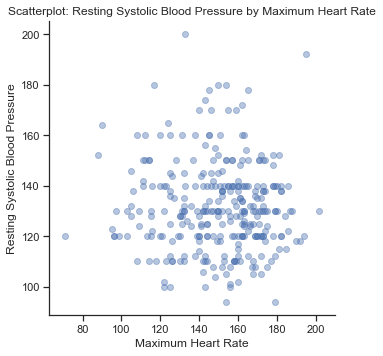

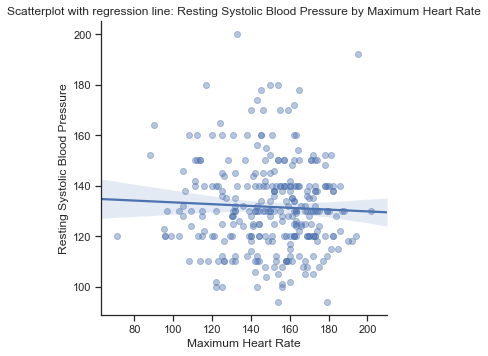

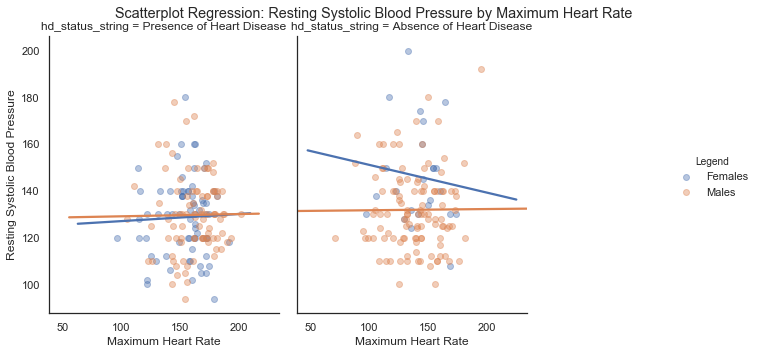

In [42]:
g = sns.lmplot(y='trestbps', # Variable 1.
               x='thalach', # Variable 2.
               data=heartdisease_df, # Data
               fit_reg=False, # If set to true, plots a regression line.
               scatter_kws={'alpha':0.4}) # Set points to semi-transparent to see overlaping points.
g.set_ylabels("Resting Systolic Blood Pressure")
g.set_xlabels("Maximum Heart Rate")
plt.title('Scatterplot: Resting Systolic Blood Pressure by Maximum Heart Rate')
plt.show()

g = sns.lmplot(y='trestbps', 
               x='thalach',
               data=heartdisease_df, # Data.
               fit_reg=True, # The regression line also includes a 95% confidence envelope.
               scatter_kws={'alpha':0.4})
g.set_ylabels("Resting Systolic Blood Pressure")
g.set_xlabels("Maximum Heart Rate")
plt.title('Scatterplot with regression line: Resting Systolic Blood Pressure by Maximum Heart Rate')
plt.show()


sns.set(style="white")

g = sns.lmplot(y='trestbps', 
               x='thalach',
               data=heartdisease_df, # Data.
               hue='sex',
               col='hd_status_string',
               fit_reg=True,
               ci=False,
               scatter_kws={'alpha':0.4})
g.set_ylabels("Resting Systolic Blood Pressure")
g.set_xlabels("Maximum Heart Rate")
plt.suptitle('Scatterplot Regression: Resting Systolic Blood Pressure by Maximum Heart Rate')
plt.subplots_adjust(top=0.9)
g._legend.set_title(new_title)

for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.7)    


plt.show()

## Choose one continuous variable and one categorical variable, and plot them six different ways.

----------------------------------------------------------------------------------------------------------

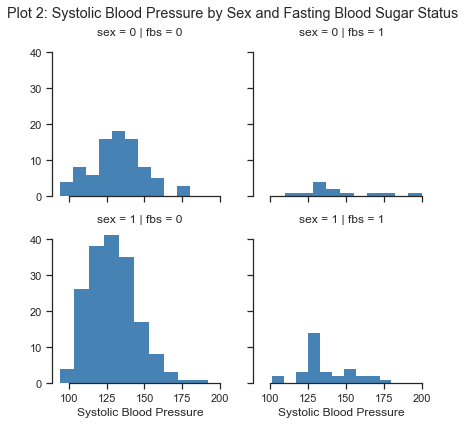

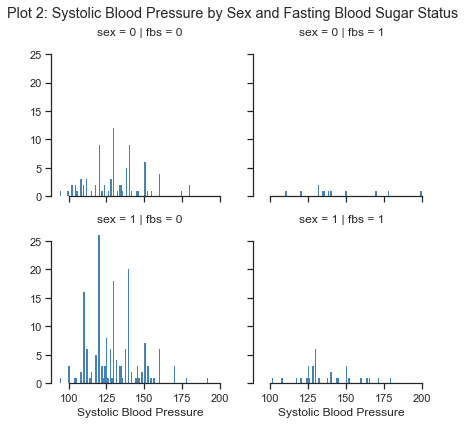

In [45]:
sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(heartdisease_df, row="sex", col="fbs")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "trestbps", color="steelblue",  lw=0, density=False)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Systolic Blood Pressure')
plt.suptitle('Plot 2: Systolic Blood Pressure by Sex and Fasting Blood Sugar Status')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()


sns.set(style="ticks")  #Setting the overall aesthetic

# Tell seaborn about the structure of our data.
g = sns.FacetGrid(heartdisease_df, row="sex", col="fbs")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "trestbps", color="steelblue",  lw=0, density=False, bins=100)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=0.9)
# Making a more informative axis name.
g.set_axis_labels('Systolic Blood Pressure')
plt.suptitle('Plot 2: Systolic Blood Pressure by Sex and Fasting Blood Sugar Status')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()












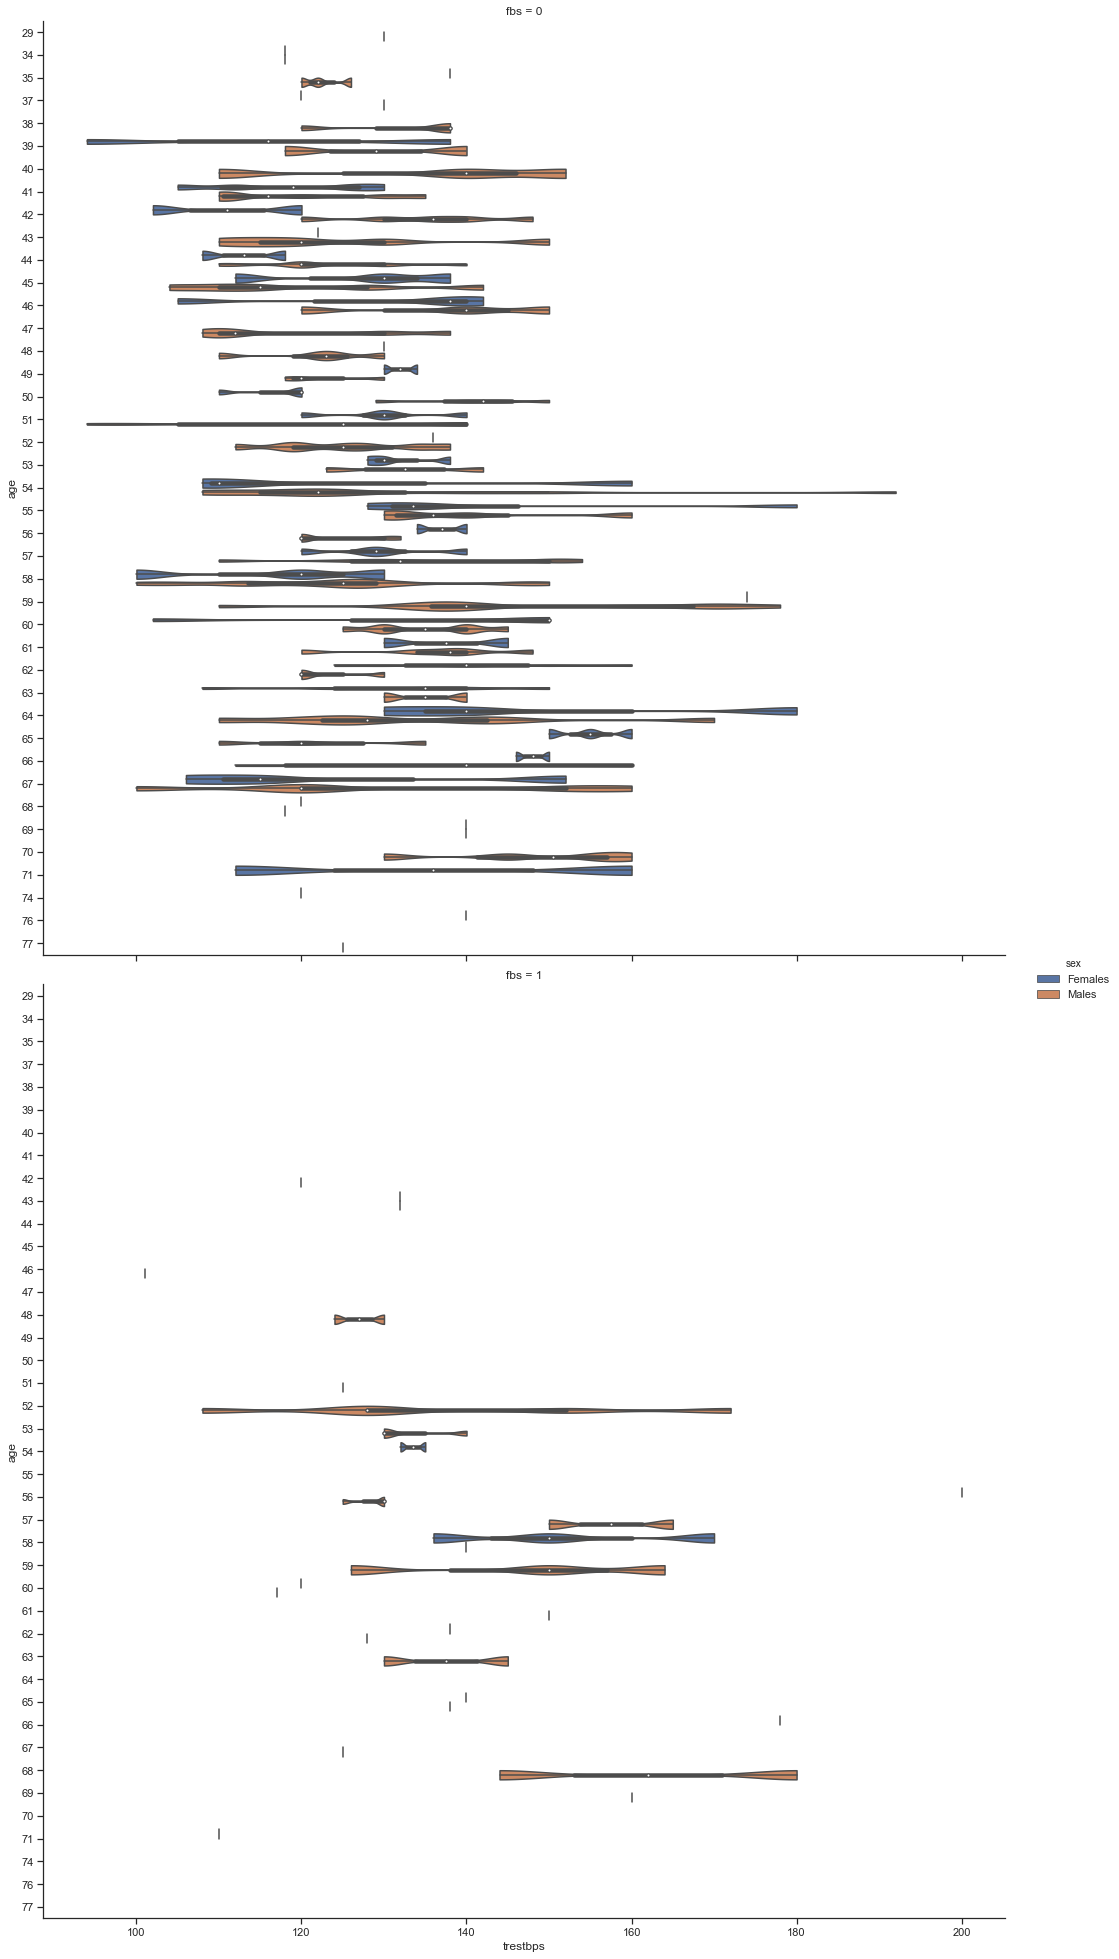

In [41]:
g = sns.catplot(x="trestbps", y="age",
hue="sex", row="fbs",
data=heartdisease_df,
orient="h", height=15, aspect=1,
kind="violin", dodge=True, cut=0, bw=.2)
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
g.fig.subplots_adjust(top=0.9,right=0.9)  
plt.show()

---------------------------------------------------------------

## Description

## 1

The trends for the resting systolic blood pressure data were as follows:

For some reason the females without heart disease tended to have higher blood pressure. On further exploration this can be explained by the smaller relative sample size of this group and the presence of the largest outier in the whole dataset (an individual with systolic blood pressure of 200). Other than this there do not seem to be significant differences between the groups.

## 2

There were also no major associations between systolic blood pressure and maximum heart rate. 


## 3

Systolic blood pressure seems to be relatively normally distributed in the sample. When the data is divided based on sex and blood sugar status, this relationship hold true. There also does not seem to be any major differences based on sex, blood sugar status or sex X blood sugar status interactions. In males with blood sugar >120mg/ml there do seem to be more individuals with blood pressure between 125 and 130mmHg. This is likely a product of a rounding error in the way the bins are set up, and/or a product of the relatively smaller group of individuals who have blood sugar >120mg/ml. To investigate this, I also plotted with a greater number of bins - the data seem to be more normally distributed with this approach.


